In [1]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.special import gamma
np.random.seed(42)

In [2]:
def adfibo(alpha, n, x):
    s = 0*x
    for i in range(int(np.ceil(alpha)),n+1):
        if (i+n)%2==0:
            s=s+0
        else:
            s=s+(sp.gamma((n+i+1)/2))/(sp.gamma(i-alpha+1)*sp.gamma((n-i+1)/2))*x**(i-alpha)
    return s

def Input(x,degree,alpha):
    inp_x = []
    for i in range(1,degree+1):
        inp_x.append(adfibo(alpha,i,x))
    return np.array([inp_x])

def Neural_Network(input,degree,alpha,weights):
    z=[]
    z.append(Input(input, degree, alpha))
    z.append(np.dot(z[0],weights.T))
    return z[1], z[0]

In [3]:
def prob(input,alpha, degree,weights):
    tri_w = np.zeros_like(weights)
    h = np.zeros((len(weights[0]),len(weights[0])))
    error1  = 0
    error2  = 0
    z_int, dw_int = Neural_Network(0,degree,0,weights)
    for l in input:
        z, dw = Neural_Network(l,degree,0,weights)
        z_alp, dw_alp = Neural_Network(l,degree,alpha,weights)
        
        tri_w =tri_w +2*(z_alp - 2*z + z**2-1)*(dw_alp - 2*dw +2*z*dw)
        
        for i in range(len(weights[0])):
                 for j in range(len(weights[0])):
                     h[i,j]=h[i,j]+2*(dw_alp[0,i] - 2*dw[0,i] +2*z*dw[0,i])*(dw_alp[0,j] - 2*dw[0,j] +2*z*dw[0,j])\
                            +2*(z_alp - 2*z + z**2-1)*(2*dw[0,j]*dw[0,i])
    
        error1=error1+(z_alp - 2*z + z**2-1)**2
        error2=error2+(z_alp - 2*z + z**2-1)**2
        
    tri_w = tri_w/(2*len(input)) + (z_int)*dw_int 
    for i in range(len(weights[0])):
                 for j in range(len(weights[0])):
                      h[i,j]=h[i,j]/(2*len(input))+ dw_int[0,i]*dw_int[0,j] 
                     
    error1=error1/(2*len(input)) +1/2*(z_int)**2
        
    return error1, error2/(2*len(input)),tri_w,h


def feed_farward(input,alpha, degree,accuracy,iter):
    w = r.random_sample((1,degree))
    k=0
    lem = 10**4
    error11, error22 = 0, 0
    while k<iter:
        error1,error2, tri_w, h,  = prob(input, alpha,degree,w)
        
        if error1<accuracy:
            break
        else:
            determinant = np.linalg.det(h+lem*np.identity(len(h)))
            if determinant == 0:
                print("Determinant is zero, stopping the process")
                break
            w_next = w.T - np.dot(np.linalg.inv(h+lem*np.identity(len(h))),tri_w.T)
            error11,error22,_,_ = prob(input, alpha,degree,w_next.T)
            
            if error11<error1:
                w = w_next.T
                k= k+1
                lem = lem/2 #if lem>10**(-9) else lem
                print(f"Number of iteration is {k} and error is {error11}") 
            else:
                lem = 2*lem
                print(f"lemda is increasing {lem}")
                if lem>10**(20):
                     break
            
    return w, error11, error22

In [4]:
#input = np.linspace(0,1,11)
input  = np.random.random_sample(20)
degree = 20

w , error1, error2 = feed_farward(input,1, degree,10**(-31),500) 

C:\Users\DELL\AppData\Local\Temp\ipykernel_20584\701720852.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  h[i,j]=h[i,j]+2*(dw_alp[0,i] - 2*dw[0,i] +2*z*dw[0,i])*(dw_alp[0,j] - 2*dw[0,j] +2*z*dw[0,j])\


Number of iteration is 1 and error is [[1.54092787e+13]]
Number of iteration is 2 and error is [[3.04362672e+12]]
Number of iteration is 3 and error is [[6.01128117e+11]]
Number of iteration is 4 and error is [[1.18705585e+11]]
Number of iteration is 5 and error is [[2.34325308e+10]]
Number of iteration is 6 and error is [[4.62199877e+09]]
Number of iteration is 7 and error is [[9.10191277e+08]]
Number of iteration is 8 and error is [[1.78673957e+08]]
Number of iteration is 9 and error is [[34878262.15588988]]
Number of iteration is 10 and error is [[6758954.21589043]]
Number of iteration is 11 and error is [[1309258.7340671]]
Number of iteration is 12 and error is [[262188.50235475]]
Number of iteration is 13 and error is [[57042.37382995]]
Number of iteration is 14 and error is [[13390.67102013]]
Number of iteration is 15 and error is [[3131.75539163]]
Number of iteration is 16 and error is [[891.61512069]]
Number of iteration is 17 and error is [[233.91492781]]
Number of iteration i

In [5]:
def Nsol(Input,degree, weights):
    NumSol = []

    for i in Input:
        z1, z2 = Neural_Network(i,degree,0,weights)
        NumSol.append(z1[0,0])
    return NumSol

NumSol = Nsol(input, degree, w)

def Exsol(t):
    sol  = 1 + np.sqrt(2)*np.tanh(np.sqrt(2)*t+1/2*np.log((np.sqrt(2)-1)/(np.sqrt(2)+1)))
    return sol


input_plot = np.linspace(0,1,101)

exacSol = Exsol(input_plot)
NumSol = Nsol(input_plot, degree, w)

error=abs(NumSol-exacSol)
relative_error = [error[i]/exacSol[i] if exacSol[i] != 0 else 0 for i in range(len(input_plot))]

In [6]:
alphas = [0.75, 0.5]

solutions = []

input_for_plot = np.linspace(0,1,101)

solutions.append(Nsol(input_for_plot, degree, w))

for i in alphas:
    weight, error1, error2 = feed_farward(input,i, degree,10**(-31),500)
    w = weight
    solutions.append(Nsol(input_for_plot, degree, w))

    print(f"For alpha {i} solution is calculated")


Number of iteration is 1 and error is [[2.19655977e+12]]

C:\Users\DELL\AppData\Local\Temp\ipykernel_20584\701720852.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  h[i,j]=h[i,j]+2*(dw_alp[0,i] - 2*dw[0,i] +2*z*dw[0,i])*(dw_alp[0,j] - 2*dw[0,j] +2*z*dw[0,j])\



Number of iteration is 2 and error is [[4.33879577e+11]]
Number of iteration is 3 and error is [[8.57008506e+10]]
Number of iteration is 4 and error is [[1.69269264e+10]]
Number of iteration is 5 and error is [[3.34286948e+09]]
Number of iteration is 6 and error is [[6.60009729e+08]]
Number of iteration is 7 and error is [[1.30240044e+08]]
Number of iteration is 8 and error is [[25671411.72313662]]
Number of iteration is 9 and error is [[5048823.85279283]]
Number of iteration is 10 and error is [[988990.29777083]]
Number of iteration is 11 and error is [[192657.9411111]]
Number of iteration is 12 and error is [[37601.47851737]]
Number of iteration is 13 and error is [[7610.30032893]]
Number of iteration is 14 and error is [[1725.05050977]]
Number of iteration is 15 and error is [[425.50166685]]
lemda is increasing 0.6103515625
Number of iteration is 16 and error is [[147.37458678]]
Number of iteration is 17 and error is [[23.12587391]]
Number of iteration is 18 and error is [[4.277665

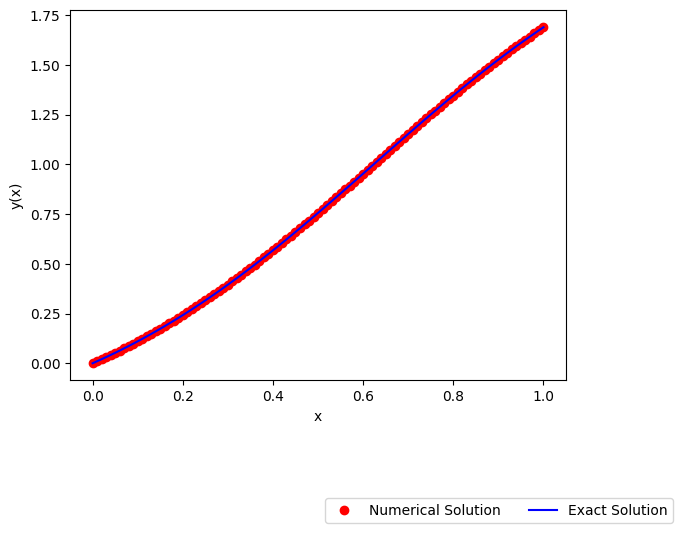

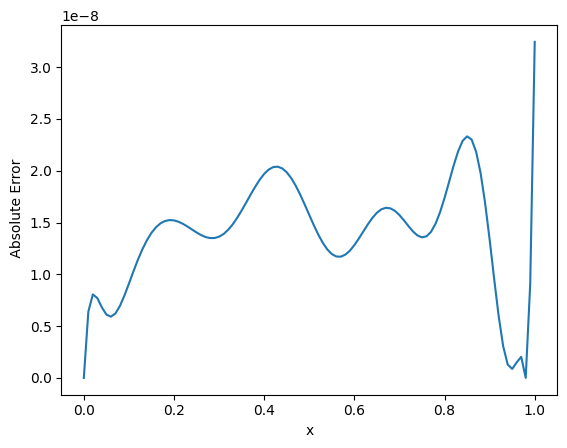

In [7]:
plt.plot(input_plot,NumSol, 'or',label="Numerical Solution")
plt.plot(input_plot, exacSol, '-b',label="Exact Solution")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend(loc='upper left', bbox_to_anchor=(0.5, -0.3),ncol=5, fancybox=True)    
#plt.savefig('line_plot.pdf',bbox_inches='tight')
plt.show()

plt.plot(input_plot, error)
plt.xlabel("x")
plt.ylabel(" Absolute Error")
plt.savefig('pic3.pdf',bbox_inches='tight')
plt.show()

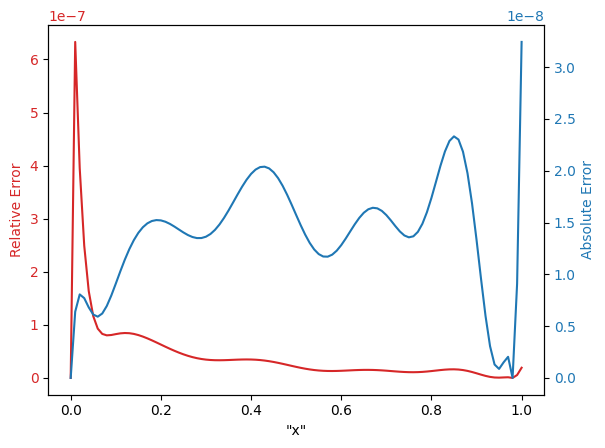

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('"x"')
ax1.set_ylabel('Relative Error', color=color, )
ax1.plot(input_plot, relative_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Absolute Error', color=color)  # we already handled the x-label with ax1
ax2.plot(input_plot, error, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.savefig('error.png')
plt.show()

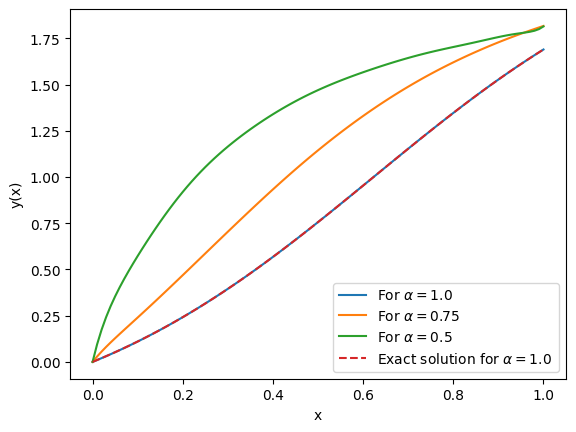

In [9]:
plt.plot(input_for_plot, solutions[0], label="For $\\alpha=1.0$")
plt.plot(input_for_plot, solutions[1], label="For $\\alpha=0.75$")
plt.plot(input_for_plot, solutions[2], label="For $\\alpha=0.5$")
#plt.plot(input_for_plot, solutions[3], label="For $\\alpha=0.4$")
plt.plot(input_plot, Exsol(input_plot), linestyle="--",  label="Exact solution for $\\alpha=1.0$ ")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()    
plt.savefig('solution.png')
plt.show()